In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
df1=pd.read_csv(r"C:\Users\MuntasirulHoque\OneDrive - ADA Global\Desktop\Dashboard_CSV\Population Growth.csv")

In [22]:
df1.head()

,Year,Population Growth Rate,Growth Rate
0,1950,"2,499,322,157",0.00%
1,1951,"2,543,130,380",1.75%
2,1952,"2,590,270,899",1.85%
3,1953,"2,640,278,797",1.93%
4,1954,"2,691,979,339",1.96%


In [23]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Year                    74 non-null     int64 
 1   Population Growth Rate  74 non-null     object
 2   Growth Rate             74 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.9+ KB


In [24]:
df1['Population']=pd.to_numeric(df1['Population Growth Rate'].str.replace(',', ''))

In [25]:
df1['Growth Rate'] = df1['Growth Rate'].str.rstrip('%').astype(float)

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    74 non-null     int64  
 1   Population Growth Rate  74 non-null     object 
 2   Growth Rate             74 non-null     float64
 3   Population              74 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.4+ KB


In [27]:
df1=df1.drop(columns=['Population Growth Rate'])

In [28]:
df1

,Year,Growth Rate,Population
0,1950,0.00,2499322157
1,1951,1.75,2543130380
2,1952,1.85,2590270899
3,1953,1.93,2640278797
4,1954,1.96,2691979339
...,...,...,...
69,2019,1.06,7764951032
70,2020,0.98,7840952880
71,2021,0.87,7909295151
72,2022,0.83,7975105156


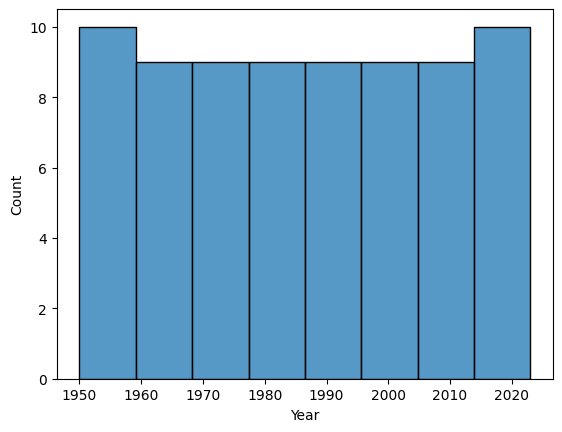

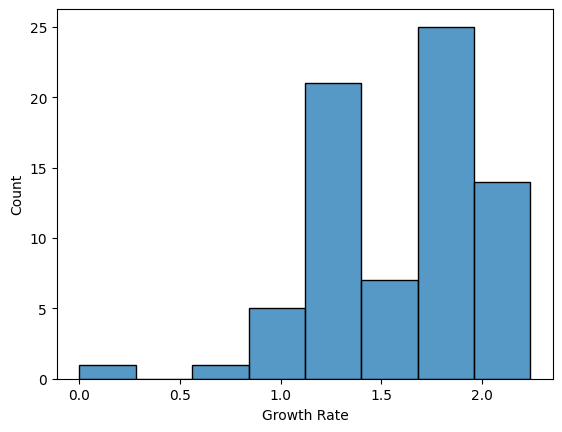

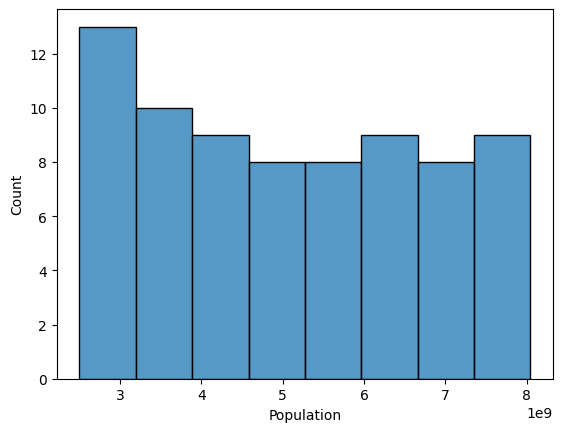

In [29]:
for i in df1.columns:
    sns.histplot(df1[i])
    plt.show()

In [30]:
def calculate_population_difference(data):
    population_differences = []
    previous_population = None

    for index, row in data.iterrows():
        current_population = row['Population']

        if previous_population is not None:
            population_difference = current_population - previous_population
            population_differences.append(population_difference)

        previous_population = current_population

    population_differences.insert(0, 0)  # Insert a placeholder value for the first year

    return population_differences

In [31]:
df1['people_added_every_year'] = calculate_population_difference(df1)

In [32]:
df1

,Year,Growth Rate,Population,people_added_every_year
0,1950,0.00,2499322157,0.0
1,1951,1.75,2543130380,43808223.0
2,1952,1.85,2590270899,47140519.0
3,1953,1.93,2640278797,50007898.0
4,1954,1.96,2691979339,51700542.0
...,...,...,...,...
69,2019,1.06,7764951032,81161204.0
70,2020,0.98,7840952880,76001848.0
71,2021,0.87,7909295151,68342271.0
72,2022,0.83,7975105156,65810005.0


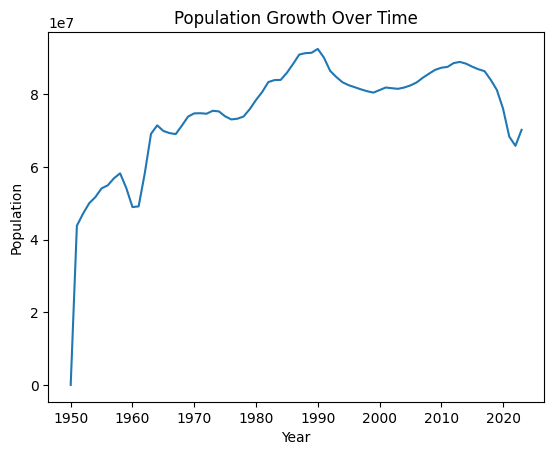

In [33]:
plt.plot(df1['Year'], df1['people_added_every_year'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Growth Over Time')
plt.show()

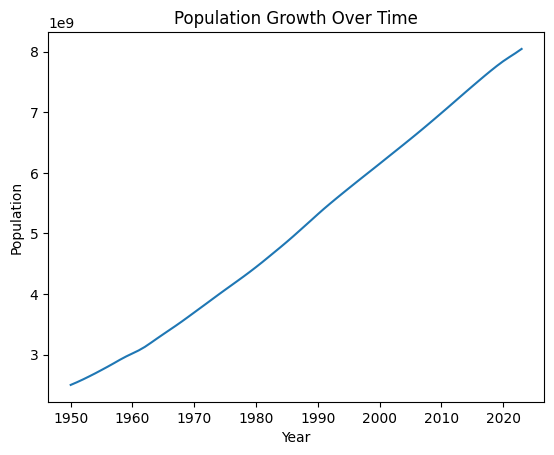

In [34]:
plt.plot(df1['Year'], df1['Population'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Growth Over Time')
plt.show()

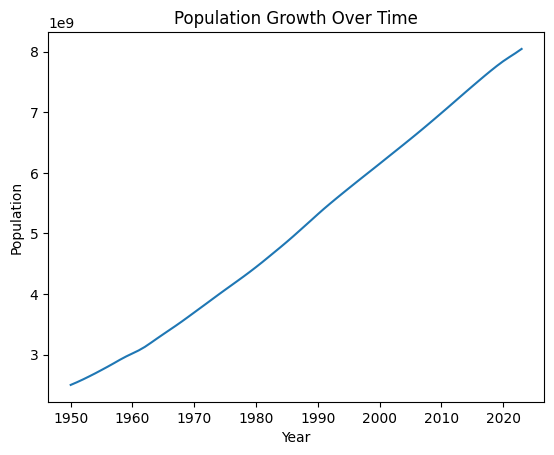

In [35]:
plt.plot(df1['Year'], df1['Population'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Growth Over Time')
plt.show()

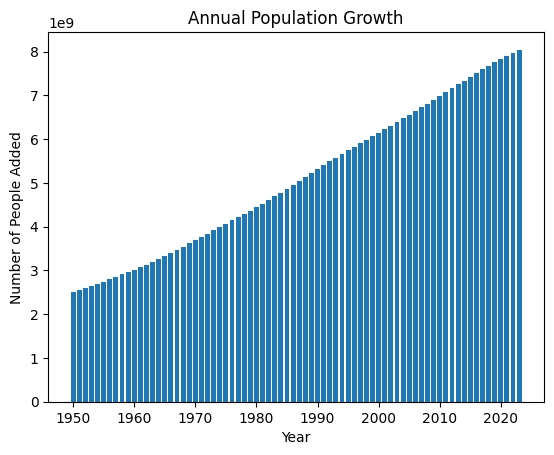

In [36]:
plt.bar(df1['Year'], df1['Population'])
plt.xlabel('Year')
plt.ylabel('Number of People Added')
plt.title('Annual Population Growth')
plt.show()

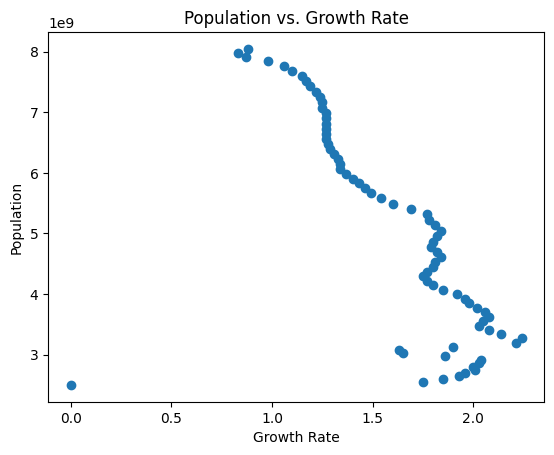

In [37]:
plt.scatter(df1['Growth Rate'], df1['Population'])
plt.xlabel('Growth Rate')
plt.ylabel('Population')
plt.title('Population vs. Growth Rate')
plt.show()

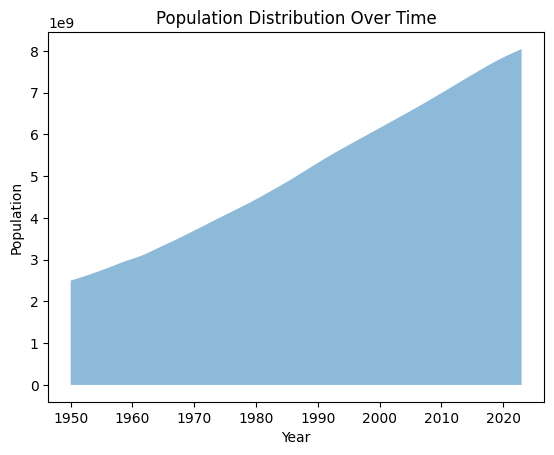

In [38]:
plt.fill_between(df1['Year'], df1['Population'], alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Distribution Over Time')
plt.show()

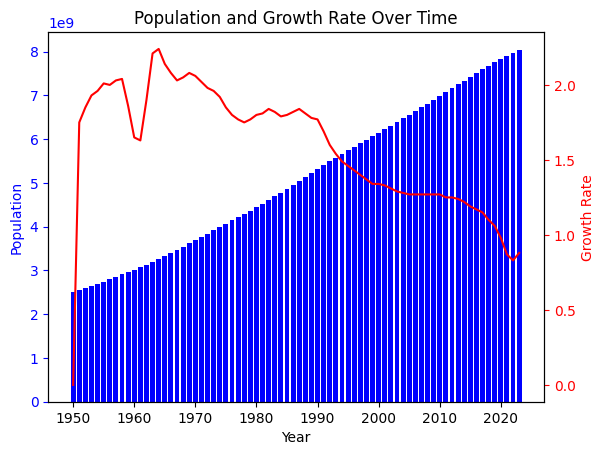

In [39]:
fig, ax1 = plt.subplots()

ax1.bar(df1['Year'], df1['Population'], color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(df1['Year'], df1['Growth Rate'], color='red')
ax2.set_ylabel('Growth Rate', color='red')
ax2.tick_params('y', colors='red')

plt.title('Population and Growth Rate Over Time')
plt.show()

<Axes: >

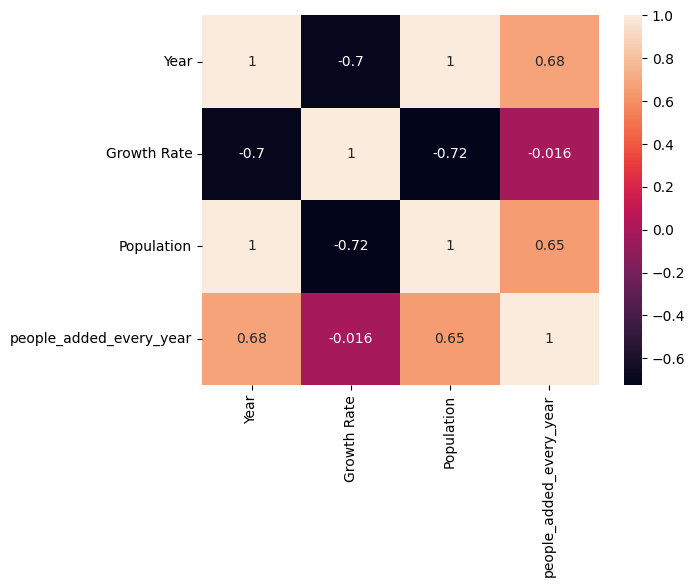

In [40]:
sns.heatmap(df1.corr(),annot=True)